In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('dataset/heart.csv')

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# no messing values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

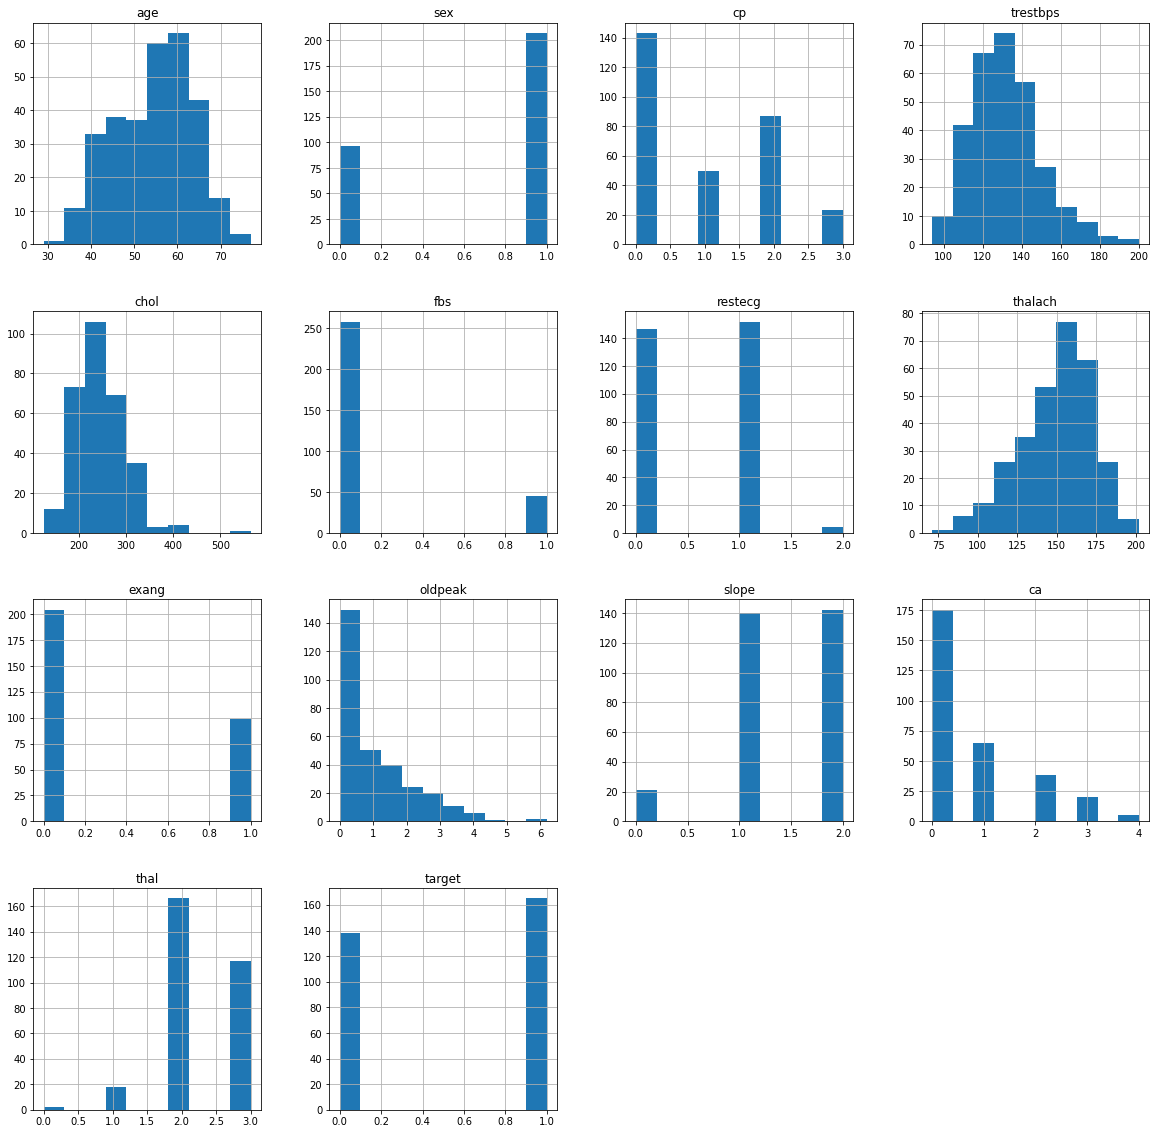

In [8]:
dataset.hist(figsize=(20,20))

<AxesSubplot:>

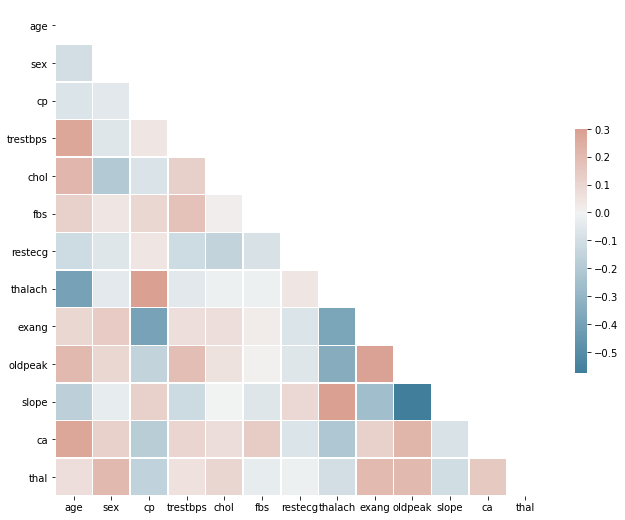

In [9]:
corr = dataset.drop(['target'],1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:title={'center':'Correlation with target'}>

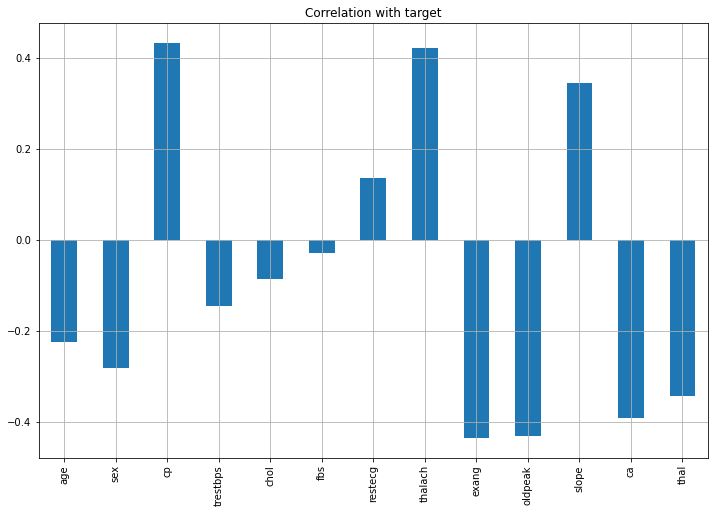

In [10]:
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

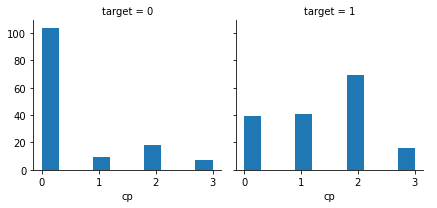

In [11]:
g = sns.FacetGrid(dataset, col='target')
g.map(plt.hist, 'cp' , bins=10)
g.add_legend()

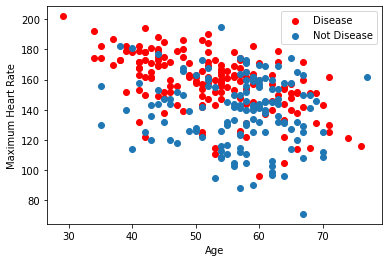

In [12]:
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)], c="red")
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

/home/it/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/it/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


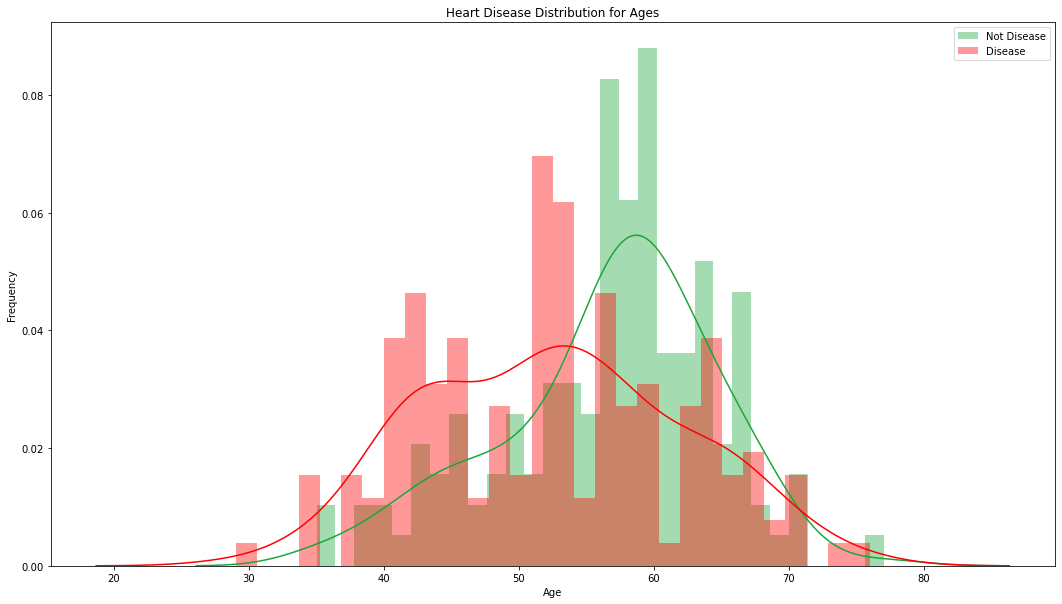

In [13]:
plt.figure(figsize=(18, 10))
sns.distplot(dataset.age[dataset['target'] == 0], bins=30, color='#1CA53B', label='Not Disease')
sns.distplot(dataset.age[dataset['target'] == 1], bins=30, color='red', label='Disease')
plt.legend()
plt.title('Heart Disease Distribution for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

# Import tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [15]:
# Define our feasures and leabels
X = dataset.drop(['target'], axis=1).values
y = dataset['target'].values

In [16]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [17]:
class Model:
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.5, random_state=42)
        
        self.model.fit(self.X_train, self.y_train)
        print(f"{self.model_str()} Model Trained..")
        self.y_pred = self.model.predict(self.X_test)
        
    def model_str(self):
        return str(self.model.__class__.__name__)
    
    def crossValScore(self, cv=5):
        print(self.model_str() + "\n" + "="*60)
        scores = ["accuracy", "precision", "recall", "roc_auc"]
        for score in scores:  
            cv_acc = cross_val_score(self.model, 
                                     self.X_train, 
                                     self.y_train, 
                                     cv=cv, 
                                     scoring=score).mean()
            
            print("Model " + score + " : " + "%.3f" % cv_acc)
        
        
    def accuracy(self):
        accuarcy = accuracy_score(self.y_test, self.y_pred)
        print(self.model_str() + " Model " + "Accuracy is: ")
        return accuarcy
        
    def confusionMatrix(self):        
        plt.figure(figsize=(5, 5))
        mat = confusion_matrix(self.y_test, self.y_pred)
        sns.heatmap(mat.T, square=True, 
                    annot=True, 
                    cbar=False, 
                    xticklabels=["Haven't Disease", "Have Disease"], 
                    yticklabels=["Haven't Disease", "Have Disease"])
        
        plt.title(self.model_str() + " Confusion Matrix")
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values');
        plt.show();
        
    def classificationReport(self):
        print(self.model_str() + " Classification Report" + "\n" + "="*60)
        print(classification_report(self.y_test, 
                                    self.y_pred, 
                                    target_names=['Non Disease', 'Disease']))
    
    def rocCurve(self):
        y_prob = self.model.predict_proba(self.X_test)[:,1]
        fpr, tpr, thr = roc_curve(self.y_test, y_prob)
        lw = 2
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, 
                 color='darkorange', 
                 lw=lw, 
                 label="Curve Area = %0.3f" % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='green', 
                 lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_str() + ' Receiver Operating Characteristic Plot')
        plt.legend(loc="lower right")
        plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = Model(model=RandomForestClassifier(), X=X, y=y)

RandomForestClassifier Model Trained..


In [19]:
clf.accuracy()

RandomForestClassifier Model Accuracy is: 


0.8289473684210527

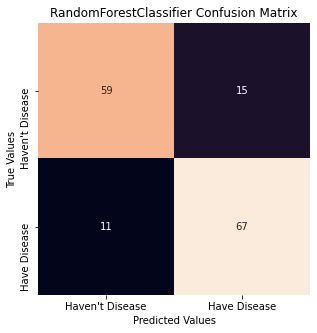

In [20]:
clf.confusionMatrix()

In [21]:
clf.classificationReport()

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.80      0.84      0.82        70
     Disease       0.86      0.82      0.84        82

    accuracy                           0.83       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.83      0.83      0.83       152



In [22]:
from sklearn.svm import SVC

svm = Model(model=SVC(C=5, probability=True), X=X, y=y)

SVC Model Trained..


In [23]:
svm.crossValScore(cv=10)

SVC
Model accuracy : 0.781
Model precision : 0.821
Model recall : 0.760
Model roc_auc : 0.871


In [24]:
svm.accuracy()

SVC Model Accuracy is: 


0.7697368421052632

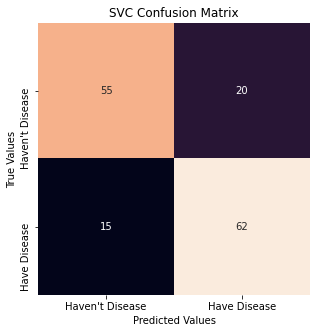

In [25]:
svm.confusionMatrix()

In [26]:
svm.classificationReport()

SVC Classification Report
              precision    recall  f1-score   support

 Non Disease       0.73      0.79      0.76        70
     Disease       0.81      0.76      0.78        82

    accuracy                           0.77       152
   macro avg       0.77      0.77      0.77       152
weighted avg       0.77      0.77      0.77       152



In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = Model(model=KNeighborsClassifier(n_neighbors=100), X=X, y=y)

KNeighborsClassifier Model Trained..


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = Model(model=KNeighborsClassifier(n_neighbors=100), X=X, y=y)